# Actividad - Regresión Lineal

* **Nombre:** José Emiliano Riosmena Castañón
* **Matrícula:** A01704245

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('presion.csv')
df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

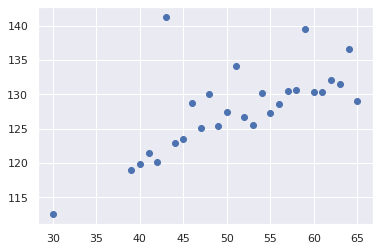

In [3]:
# Grafica la información de la edad y presión alta
plt.scatter(df['Age'], df['Average of ap_hi'])

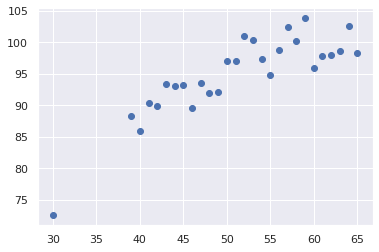

In [4]:
# Grafica la información de la edad y presión baja
plt.scatter(df['Age'], df['Average of ap_lo'])

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [7]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
model1 = LinearRegression(fit_intercept = True)
model1.fit(df['Age'][:, np.newaxis], df['Average of ap_hi'])

print("Valor de A:", model1.coef_[0])
print("Valor de B:", model1.intercept_)

Valor de A: 0.47769702977669154
Valor de B: 103.3969740964366


<ipython-input-7-c5cdf433a562>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1.fit(df['Age'][:, np.newaxis], df['Average of ap_hi'])


In [8]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
model2 = LinearRegression(fit_intercept = True)
model2.fit(df['Age'][:, np.newaxis], df['Average of ap_lo'])

print("Valor de A:", model2.coef_[0])
print("Valor de B:", model2.intercept_)

Valor de A: 0.6089810580238237
Valor de B: 63.726200409422745


<ipython-input-8-3f9f8efc55ce>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(df['Age'][:, np.newaxis], df['Average of ap_lo'])


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

<ipython-input-9-edf090a10c03>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([df['Age'],df['Age']]), np.vstack([df['Average of ap_hi'], model1.predict(df['Age'][:, np.newaxis])]), color="green")


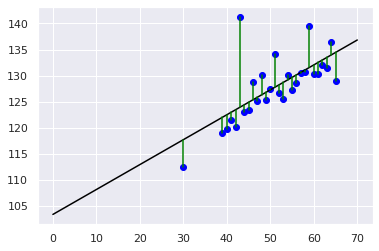

In [9]:
# Presión alta
fitx = np.linspace(0, 70, 1000)
fity = model1.predict(fitx[:, np.newaxis])

plt.scatter(df['Age'], df['Average of ap_hi'], color = "blue")
plt.plot(fitx, fity, color = "black")
plt.plot(np.vstack([df['Age'],df['Age']]), np.vstack([df['Average of ap_hi'], model1.predict(df['Age'][:, np.newaxis])]), color="green")

<ipython-input-10-32fbcc7d51ff>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([df['Age'],df['Age']]), np.vstack([df['Average of ap_lo'], model2.predict(df['Age'][:, np.newaxis])]), color="green")


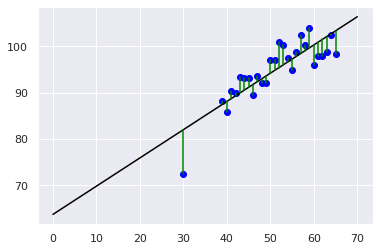

In [10]:
# Presión baja
fitx = np.linspace(0, 70, 1000)
fity = model2.predict(fitx[:, np.newaxis])

plt.scatter(df['Age'], df['Average of ap_lo'], color = "blue")
plt.plot(fitx, fity, color = "black")
plt.plot(np.vstack([df['Age'],df['Age']]), np.vstack([df['Average of ap_lo'], model2.predict(df['Age'][:, np.newaxis])]), color="green")

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [13]:
def pressure_low(age):
  return model2.predict([[age]])

query_age= 76
pressure_low(query_age)

array([110.00876082])

In [14]:
def pressure_high(age):
  return model1.predict([[age]])

query_age= 76
pressure_high(query_age)

array([139.70194836])